In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
boston = load_boston()

D:\anaconda3\envs\{tunglam}\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston['data'].shape

(506, 13)

In [10]:
bost = pd.DataFrame(boston['data'])

In [11]:
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bost.columns = boston['feature_names']

In [13]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
# Normalize input matrix so that data lies in the range of -1 to 1
X = (bost - bost.mean())/(bost.max() - bost.min())

In [16]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-3.208896e-18,1.148072e-16,-6.812595e-16,-1.189760e-16,6.223338e-16,-1.521044e-15,-3.491388e-16,1.206490e-16,6.406821e-17,1.933017e-16,-2.300312e-15,1.881620e-15,-1.082797e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,3.785765e-01,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-3.717134e-01,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-2.412786e-01,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-1.978003e-01,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,6.282866e-01,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,6.282866e-01,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [18]:
y = boston['target']

In [19]:
y.shape

(506,)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=5)

In [21]:
X_train.shape

(339, 13)

In [22]:
# our model needs X_training of dimension (number_features x number_training_examples)
X_train = X_train.T

In [23]:
X_train.shape

(13, 339)

In [24]:
y_train.shape

(339,)

In [25]:
y_train = np.array([y_train])

In [26]:
y_train.shape

(1, 339)

In [27]:
X_val = X_val.T

In [28]:
X_val.shape

(13, 167)

In [29]:
y_val = np.array([y_val])

In [30]:
y_val.shape

(1, 167)

In [39]:
ln = LinearRegression()
ln.fit(X_train.T, y_train.T)
y_pred = ln.predict(X_val.T)

ValueError: Found input variables with inconsistent numbers of samples: [13, 1]

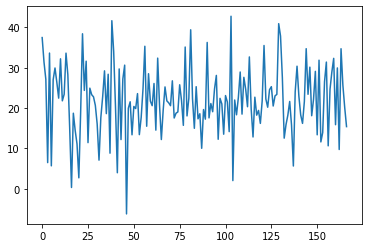

In [34]:
plt.plot(y_pred)